In [7]:
#Ques 1 : EDA

import pandas as pd
df = pd.read_csv(r"C:\Users\hp\Downloads\house_price.csv")
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.0

In [9]:
print(df.columns)

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')


In [3]:
# Ques 2 Outlier Detection and Removal

import pandas as pd

df = pd.read_csv(r"C:\Users\hp\Downloads\house_price.csv")

print(df.columns)

if 'price_per_sqft' in df.columns:
    mean = df['price_per_sqft'].mean()
    std = df['price_per_sqft'].std()

    # Filter out outliers using mean ± 3*std
    df_trimmed = df[(df['price_per_sqft'] >= mean - 3*std) & (df['price_per_sqft'] <= mean + 3*std)]

    print("Outliers removed using mean ± 3*std")
    print(df_trimmed.describe())
else:
    print("Column 'price_per_sqft' not found in dataset.")

    

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')
Outliers removed using mean ± 3*std
         total_sqft         bath         price           bhk  price_per_sqft
count  13195.000000  13195.00000  13195.000000  13195.000000    13195.000000
mean    1555.884482      2.69064    112.267415      2.800152     6713.708602
std     1237.196807      1.33853    149.200669      1.292344     4876.727718
min       15.000000      1.00000      8.000000      1.000000      267.000000
25%     1100.000000      2.00000     50.000000      2.000000     4266.500000
50%     1275.000000      2.00000     71.740000      3.000000     5434.000000
75%     1672.500000      3.00000    120.000000      3.000000     7313.000000
max    52272.000000     40.00000   3600.000000     43.000000   200000.000000


In [5]:
# Percentile Method

import pandas as pd

df = pd.read_csv(r"C:\Users\hp\Downloads\house_price.csv")

print("Available columns:", df.columns)

if 'price_per_sqft' in df.columns:
    lower = df['price_per_sqft'].quantile(0.01)
    upper = df['price_per_sqft'].quantile(0.99)

    # Trim the data
    df_trimmed_percentile = df[(df['price_per_sqft'] >= lower) & (df['price_per_sqft'] <= upper)]

    print("Data after removing outliers (1st to 99th percentile):")
    print(df_trimmed_percentile.describe())
else:
    print("Column 'price_per_sqft' not found in dataset.")


Available columns: Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')
Data after removing outliers (1st to 99th percentile):
         total_sqft          bath         price           bhk  price_per_sqft
count  12941.000000  12941.000000  12941.000000  12941.000000    12941.000000
mean    1529.261860      2.672359    106.685238      2.781392     6494.895139
std      941.591068      1.264080    119.651740      1.210163     3502.061133
min      250.000000      1.000000      8.000000      1.000000     2549.000000
25%     1100.000000      2.000000     50.000000      2.000000     4285.000000
50%     1275.000000      2.000000     71.130000      3.000000     5434.000000
75%     1664.000000      3.000000    120.000000      3.000000     7252.000000
max    30400.000000     27.000000   2340.000000     27.000000    23674.000000


In [23]:
# IQR method

import pandas as pd

df = pd.read_csv(r"C:\Users\hp\Downloads\house_price.csv") 

print("Available columns:", df.columns)

if 'price_per_sqft' in df.columns:
    Q1 = df['price_per_sqft'].quantile(0.25)
    Q3 = df['price_per_sqft'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_trimmed_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

    print("Outliers removed using IQR method:")
    print(df_trimmed_iqr.describe())
else:
    print("Column 'price_per_sqft' not found in dataset.")


Available columns: Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')
Outliers removed using IQR method:
         total_sqft          bath         price           bhk  price_per_sqft
count  11935.000000  11935.000000  11935.000000  11935.000000    11935.000000
mean    1514.629659      2.533641     87.654926      2.644826     5575.925513
std     1195.959790      1.111145     73.154677      1.051124     1957.779783
min      276.000000      1.000000      8.000000      1.000000      267.000000
25%     1100.000000      2.000000     48.000000      2.000000     4166.000000
50%     1270.000000      2.000000     66.780000      2.000000     5188.000000
75%     1634.500000      3.000000    100.000000      3.000000     6603.000000
max    52272.000000     27.000000   2100.000000     27.000000    11875.000000


In [25]:
#Z score

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

df = pd.read_csv(r"C:\Users\hp\Downloads\house_price.csv")

print("Columns:", df.columns)

if 'price_per_sqft' in df.columns:
    mean = df['price_per_sqft'].mean()
    std = df['price_per_sqft'].std()

    df['z_score'] = (df['price_per_sqft'] - mean) / std
    df_trimmed_z = df[(df['z_score'] >= -3) & (df['z_score'] <= 3)].copy()
    df_trimmed_z.drop(columns='z_score', inplace=True)

    print("Z-score outliers removed.")
    print(df_trimmed_z.describe())
else:
    print("Column 'price_per_sqft' not found.")


Columns: Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')
Z-score outliers removed.
         total_sqft         bath         price           bhk  price_per_sqft
count  13195.000000  13195.00000  13195.000000  13195.000000    13195.000000
mean    1555.884482      2.69064    112.267415      2.800152     6713.708602
std     1237.196807      1.33853    149.200669      1.292344     4876.727718
min       15.000000      1.00000      8.000000      1.000000      267.000000
25%     1100.000000      2.00000     50.000000      2.000000     4266.500000
50%     1275.000000      2.00000     71.740000      3.000000     5434.000000
75%     1672.500000      3.00000    120.000000      3.000000     7313.000000
max    52272.000000     40.00000   3600.000000     43.000000   200000.000000


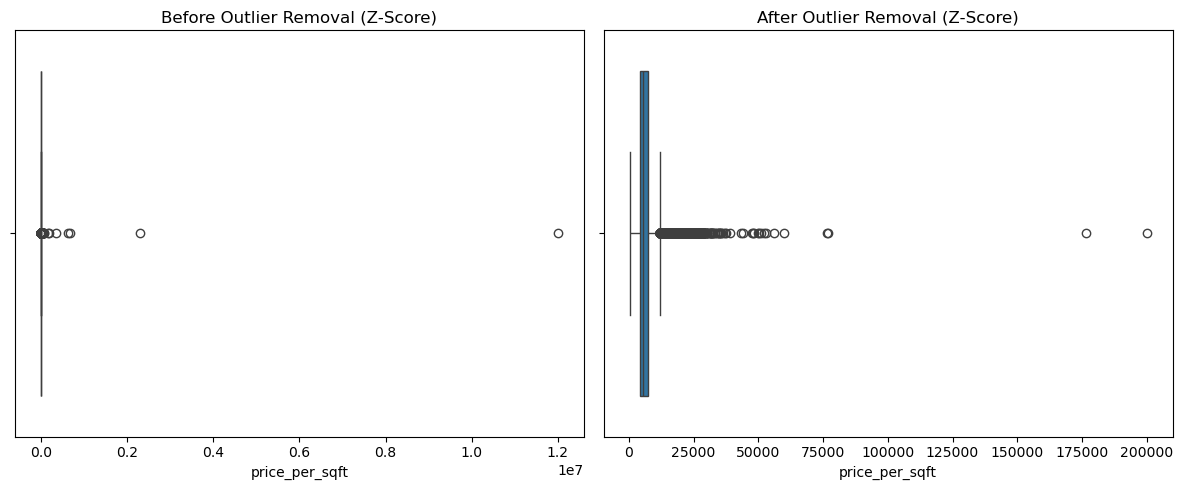

In [7]:
# Boxplot – Visualize Outliers (Before vs After Z-Score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['price_per_sqft'])
plt.title("Before Outlier Removal (Z-Score)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_trimmed_z['price_per_sqft'])
plt.title("After Outlier Removal (Z-Score)")

plt.tight_layout()
plt.show()


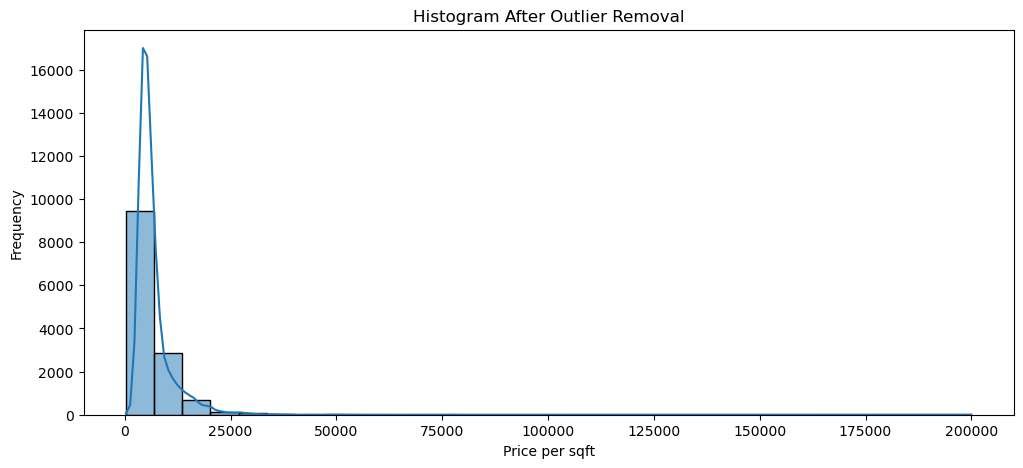

Skewness before Z-Score: 108.26875024325159
Kurtosis before Z-Score: 12090.633538860382
Skewness after Z-Score: 10.476617414984743
Kurtosis after Z-Score: 313.5273648918721


In [9]:
# Q4: Histogram, Skewness, and Kurtosis (Before & After)

# Histogram
plt.figure(figsize=(12, 5))
sns.histplot(df_trimmed_z['price_per_sqft'], kde=True, bins=30)
plt.title("Histogram After Outlier Removal")
plt.xlabel("Price per sqft")
plt.ylabel("Frequency")
plt.show()

# Skewness & Kurtosis (Before & After)
print("Skewness before Z-Score:", skew(df['price_per_sqft']))
print("Kurtosis before Z-Score:", kurtosis(df['price_per_sqft']))

print("Skewness after Z-Score:", skew(df_trimmed_z['price_per_sqft']))
print("Kurtosis after Z-Score:", kurtosis(df_trimmed_z['price_per_sqft']))


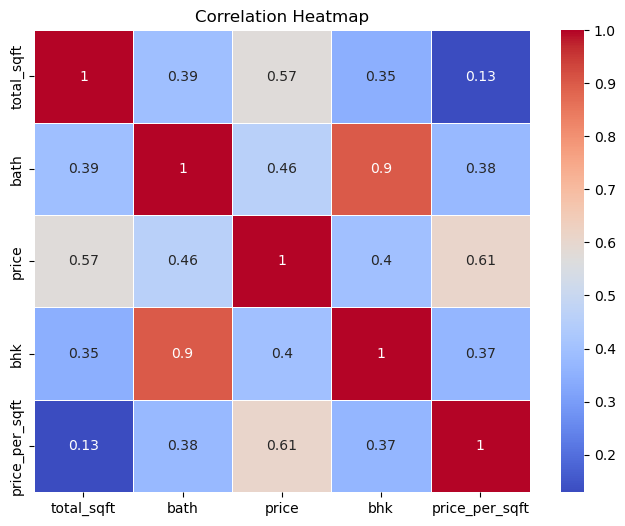

In [13]:
# Q5: Correlation and Heatmap

corr = df_trimmed_z.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


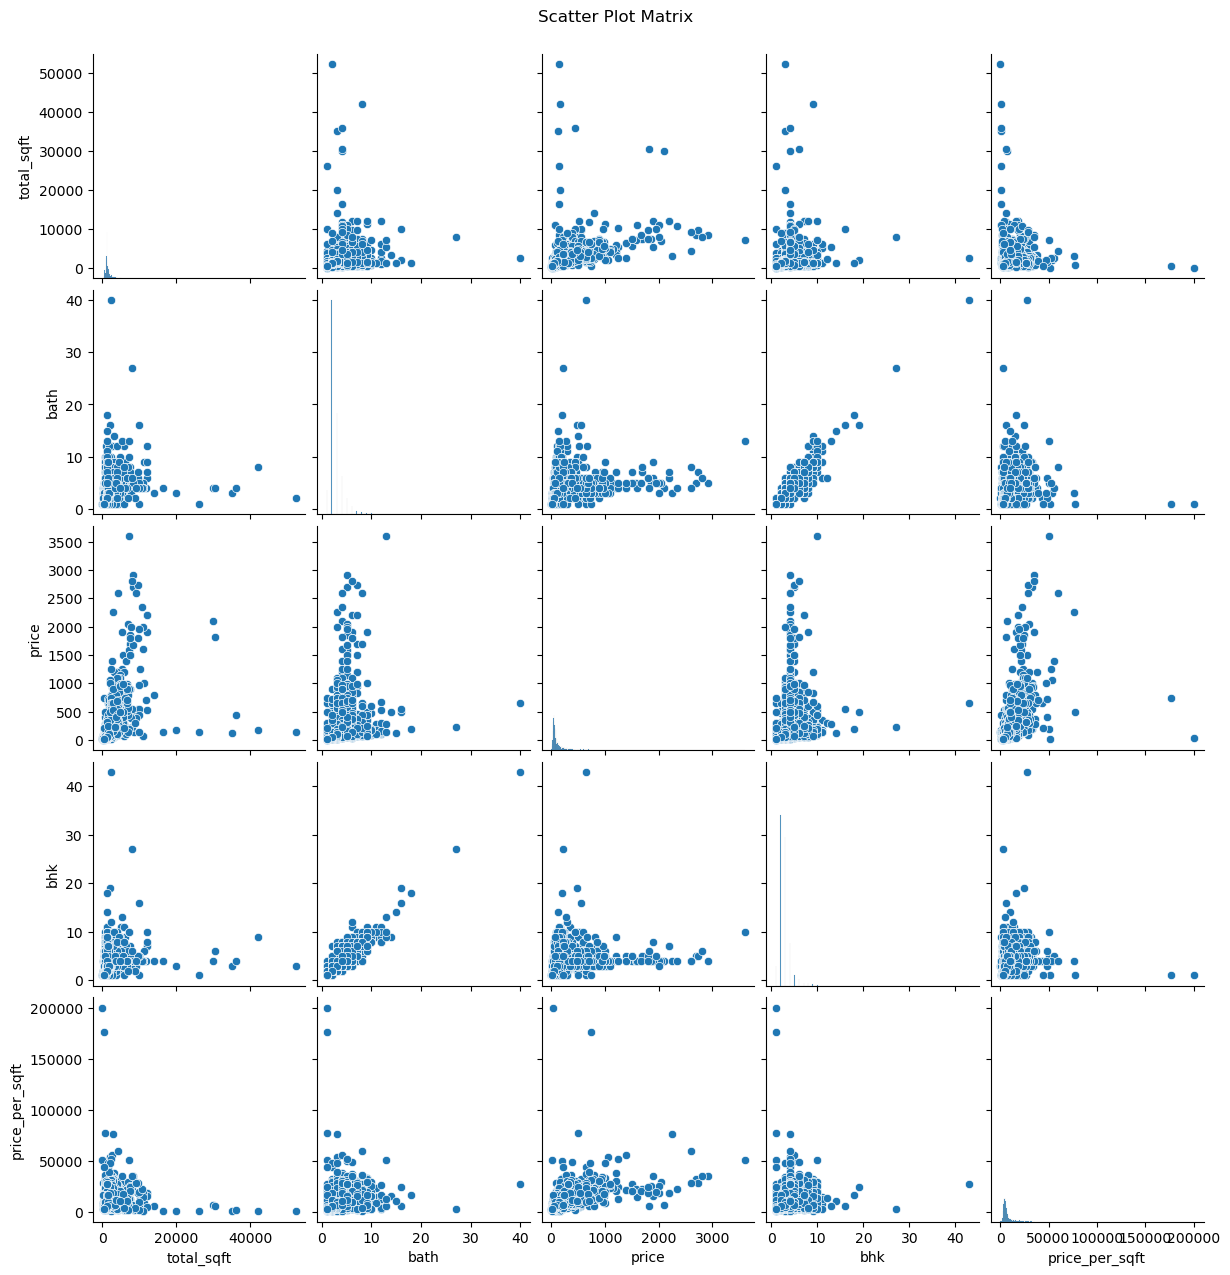

In [17]:
# Q6: Scatter Plot between Numerical Columns
sns.pairplot(df_trimmed_z.select_dtypes(include=['float64', 'int64']))
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()
